# 1

In [23]:
k=var('k')
t=var('t')
x=function('x')(t)
assume(k, 'real')

eqd = (1/k)*diff(x)+x == 0
show(eqd)

diff(x(t), t)/k + x(t) == 0

(a)

In [24]:
sol(t)=desolve(eqd, x, ivar=t)
show(sol)

t |--> _C*e^(-k*t)

(b)

In [27]:
with assuming(k, 'real'):
    sol(t)=desolve(eqd, x, ivar=t, ics=[0,100])
    show(sol)
    solsk=solve(sol(50)==200, k)
    for solk in solsk:
        show(solk)
        show(sol.substitute(solk))

t |--> 100*e^(-k*t)

k == -1/50*log(2)

t |--> 100*2^(1/50*t)

# 2

In [34]:
x=var('x')
y=function('y')(x)
eqd=diff(y,x,2) - 4*diff(y,x) + 5*y == 2*x*cos(x)
show(eqd)

5*y(x) - 4*diff(y(x), x) + diff(y(x), x, x) == 2*x*cos(x)

(a)

In [35]:
sol=desolve(eqd, y)
show(sol)

1/8*(2*x + 1)*cos(x) + (_K2*cos(x) + _K1*sin(x))*e^(2*x) - 1/4*(x + 1)*sin(x)

(b)

x |--> 1/8*(2*x + 1)*cos(x) - 1/8*(cos(x) - 26*sin(x))*e^(2*x) - 1/4*(x + 1)*sin(x)

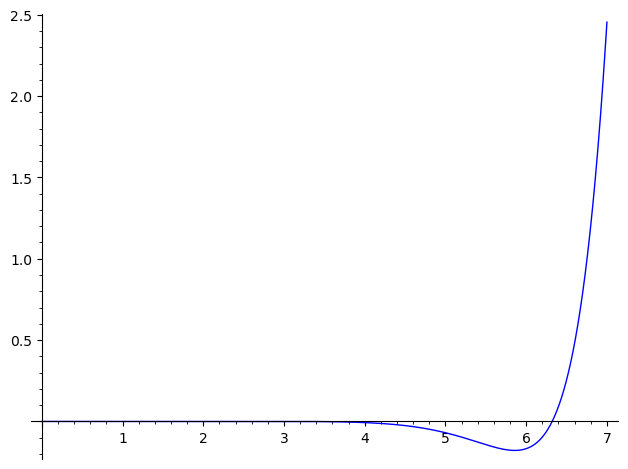

In [36]:
sol(x)=desolve(eqd, y, ics=[0,0,3])
show(sol)
plot(sol(x), xmin=0, xmax=7)

# 3

(a)

In [42]:
x=var('x')
f(x)=-x^3+x
fd(x)=diff(f)
show(f)
show(fd)
sols=solve(f(x) == 0, x)
for sol in sols:
    show(sol)
    show(fd(sol.rhs()))

x |--> -x^3 + x

x |--> -3*x^2 + 1

x == -1

-2

x == 1

-2

x == 0

1

x=-1 este local asimptotic stabil \
x=1 este local asimptotic stabil \
x=0 este instabil

(b)

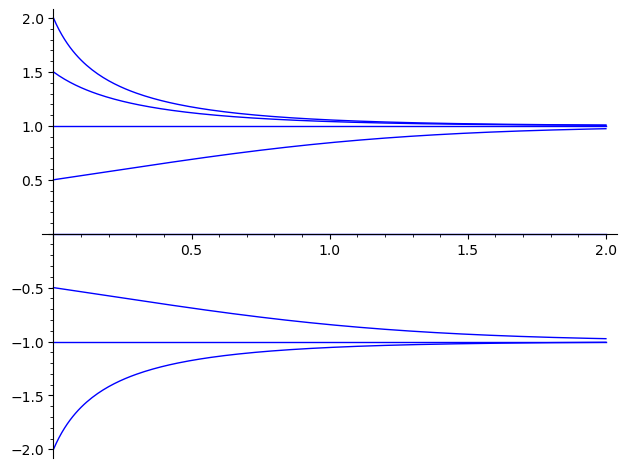

In [52]:
t=var('t')
x=function('x')(t)
eqd=diff(x) == -x^3+x
g=plot([])
for x0 in [ -2, -1, -1/2, 0, 1/2, 1, 3/2, 2 ]:
    sol=desolve_rk4(eqd, x, ics=[0,x0], end_points=[0,2], step=0.01)
    g+=list_plot(sol, plotjoined=True)
show(g)

# 4

(a)

In [138]:
x,y=var("x,y")
f1(x,y)=x^2-8*y
f2(x,y)=y^2-x
sols=solve([f1(x,y)==0, f2(x,y)==0], [x,y])
J=jacobian((f1(x,y), f2(x,y)), (x,y))
for sol in sols:
#     if sol[0].rhs().is_real() and sol[1].rhs().is_real():
    A=J(x=sol[0].rhs(), y=sol[1].rhs())
    show(sol)
    show(A.eigenvalues())

[x == 4, y == 2]

[-2*sqrt(3) + 6, 2*sqrt(3) + 6]

[x == -2*I*sqrt(3) - 2, y == I*sqrt(3) - 1]

[-I*sqrt(3) - sqrt(6*I*sqrt(3) - 18) - 3,
 -I*sqrt(3) + sqrt(6*I*sqrt(3) - 18) - 3]

[x == 2*I*sqrt(3) - 2, y == -I*sqrt(3) - 1]

[I*sqrt(3) - sqrt(-6*I*sqrt(3) - 18) - 3,
 I*sqrt(3) + sqrt(-6*I*sqrt(3) - 18) - 3]

[x == 0, y == 0]

[-2*sqrt(2), 2*sqrt(2)]

(b)

(4, 2) este instabil, de tip nod \
(0, 0) este instabil, de tip sa

In [137]:
xmin=-5
xmax=5
ymin=-5
ymax=5

n=sqrt(f1*f1+f2*f2)
g=plot_vector_field([f1(x,y)/n, f2(x,y)/n], [xmin,xmax], [ymin,ymax], plot_points=20, aspect_ratio=1)


# for x0,y0 in [ (1,1), (-1,1), (1,-1), (-1,-1), (25,0), (0,15), (4,2), (-15, 0), (0,-5) ]:
for x0,y0 in [ [Integer(randint(-10,10)), Integer(randint(-10,10))] for i in range(0,75) ]:
    P=desolve_system_rk4([f1(x,y),f2(x,y)], [x,y], ics=[0,x0,y0], ivar=t, end_points=[xmin,xmax], step=0.05)
    g+=list_plot([[j,k] for i,j,k in P], plotjoined=True, color=)
g+=point([4,2], color='red')
g+=point([0,0], color='red')
g.show(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

SyntaxError: invalid syntax (645289177.py, line 13)